# Traffic Stop Activity Result: Citation vs. Warning 

#### BA 590 Capstone: Business Analytics Applications - Proposal
#### Proposed By: Kendall Stopa
1.	Project Background/Motivation
    - Millions of Americans are stopped each year due to traffic violations. There are many reasons as to why one would be pulled over such as speeding, using a cellphone, not wearing a seatbelt, etc. What I want to know is what dictates the end result of a traffic stop? 

2.	Problem Statement/Statement of Work
    - What features are most strongly associated with an activity result of a citation or a warning?  

3.	 Preliminary Results/Exploratory Data Analysis (see figures on page 2-3)
    - The dataset that I will be using is information available in the Louisville Metro Police Department Vehicle Stops Database for 2015 – 2018, obtained from Data.gov. There are 111,582 rows and 18 columns in this dataset. 

4.	Planning Timeline with Milestones (start and end dates) for each phase of the project
    - EDA and Preprocessing &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 5/18 – End: 5/21
    - Modeling &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 5/22 – End: 6/01
    - Geo coding &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 6/03 – End: 6/15
    - Concluding Project &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Start: 6/17 – End: 6/23

5.	Summary of expected results
    - The expected result of this analytical project is to build multiple classification models commonly used machine learning algorithms to predict the activity result one would receive during a traffic stop and determine the most accurate predictive model to use for this data. To see which features of a traffic stop have the largest impact on predicting the activity result of a traffic stop I will be using feature selection. I will also be geocoding the location of each traffic stop to explore this data spatially and create a visualization where the activity result was given. 


6.	 Signoff from your advisor and your subject matter expert: 
    - Dr. Christopher Huntly
    - Mike Garvey (Alumni Class of ’89, 20 years Rockland County Police Department)




In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('BA590-LMPD/LMPDStopsDatFrame.csv', index_col=0)
df.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,NaN,NaN,WARNING,NaN,NaN,NaN,2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2,NaN,NaN,WARNING,NaN,NaN,NaN,2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3,NaN,NaN,WARNING,NaN,NaN,NaN,2016-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,NaN,NaN,WARNING,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,NaN
4,5,NaN,NaN,WARNING,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE


In [4]:
df.shape

(111582, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111582 entries, 0 to 111581
Data columns (total 18 columns):
ID                         111582 non-null int64
TYPE_OF_STOP               111455 non-null object
CITATION_CONTROL_NUMBER    94158 non-null object
ACTIVITY RESULTS           111582 non-null object
OFFICER_GENDER             111426 non-null object
OFFICER_RACE               111426 non-null object
OFFICER_AGE_RANGE          109086 non-null object
ACTIVITY_DATE              111582 non-null object
ACTIVITY_TIME              111548 non-null object
ACTIVITY_LOCATION          111443 non-null object
ACTIVITY_DIVISION          111189 non-null object
ACTIVITY_BEAT              111163 non-null object
DRIVER_GENDER              111546 non-null object
DRIVER_RACE                111550 non-null object
DRIVER_AGE_RANGE           111554 non-null object
NUMBER OF PASSENGERS       111582 non-null int64
WAS_VEHCILE_SEARCHED       111579 non-null object
REASON_FOR_SEARCH          6922 non-null o

In [6]:
df.isnull().sum()

ID                              0
TYPE_OF_STOP                  127
CITATION_CONTROL_NUMBER     17424
ACTIVITY RESULTS                0
OFFICER_GENDER                156
OFFICER_RACE                  156
OFFICER_AGE_RANGE            2496
ACTIVITY_DATE                   0
ACTIVITY_TIME                  34
ACTIVITY_LOCATION             139
ACTIVITY_DIVISION             393
ACTIVITY_BEAT                 419
DRIVER_GENDER                  36
DRIVER_RACE                    32
DRIVER_AGE_RANGE               28
NUMBER OF PASSENGERS            0
WAS_VEHCILE_SEARCHED            3
REASON_FOR_SEARCH          104660
dtype: int64

In [7]:
df.describe(include='all')

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
count,111582.000000,111455,94158,111582,111426,111426,109086,111582,111548,111443,111189,111163,111546,111550,111554,111582.000000,111579,6922
unique,NaN,3,82661,2,2,5,5,1125,1440,47718,10,8,2,10,8,NaN,2,296
top,NaN,TRAFFIC VIOLATION,0,CITATION ISSUED,M,WHITE,40 - 50,2015-04-22,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,NaN,NO,CONSENT
freq,NaN,109686,11037,82766,106551,87377,46596,302,315,2995,17765,25707,70825,69712,26570,NaN,104676,3789
mean,55791.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501362,NaN,NaN
std,32211.093206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.943409,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,27896.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,55791.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,83686.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


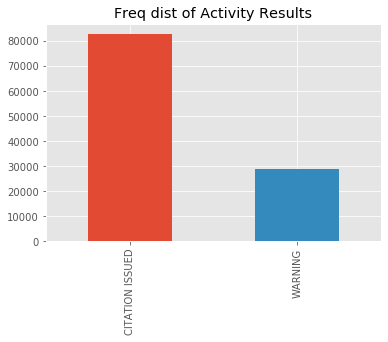

In [8]:
df['ACTIVITY RESULTS'].value_counts().plot.bar(title="Freq dist of Activity Results")

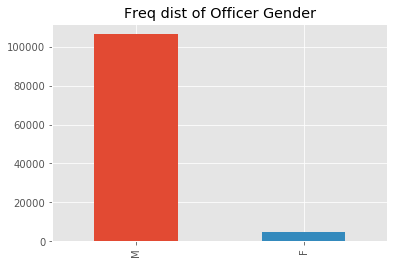

In [9]:
df['OFFICER_GENDER'].value_counts().plot.bar(title="Freq dist of Officer Gender")

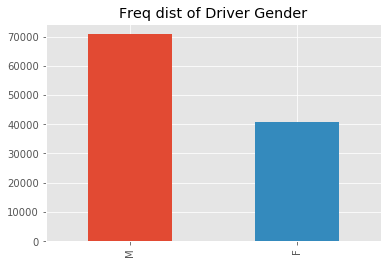

In [10]:
df['DRIVER_GENDER'].value_counts().plot.bar(title="Freq dist of Driver Gender")

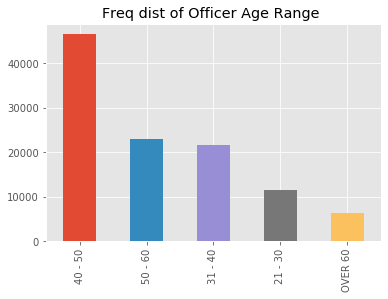

In [11]:
df['OFFICER_AGE_RANGE'].value_counts().plot.bar(title="Freq dist of Officer Age Range ")

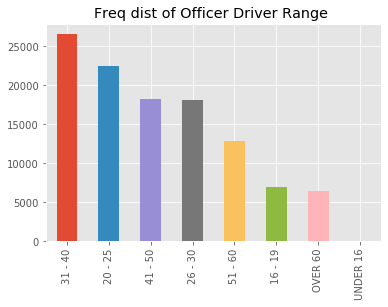

In [12]:
df['DRIVER_AGE_RANGE'].value_counts().plot.bar(title="Freq dist of Officer Driver Range ")

In [13]:
#fill missing values for each column using its own most frequent value
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

ID                         0
TYPE_OF_STOP               0
CITATION_CONTROL_NUMBER    0
ACTIVITY RESULTS           0
OFFICER_GENDER             0
OFFICER_RACE               0
OFFICER_AGE_RANGE          0
ACTIVITY_DATE              0
ACTIVITY_TIME              0
ACTIVITY_LOCATION          0
ACTIVITY_DIVISION          0
ACTIVITY_BEAT              0
DRIVER_GENDER              0
DRIVER_RACE                0
DRIVER_AGE_RANGE           0
NUMBER OF PASSENGERS       0
WAS_VEHCILE_SEARCHED       0
REASON_FOR_SEARCH          0
dtype: int64

In [14]:
# Creating a copy of the dataset, to recode values to be numerical for data analysis. 
df2 = df.copy(deep=True)
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,TRAFFIC VIOLATION,0,WARNING,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
1,2,TRAFFIC VIOLATION,0,WARNING,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
2,3,TRAFFIC VIOLATION,0,WARNING,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
3,4,TRAFFIC VIOLATION,0,WARNING,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,CONSENT
4,5,TRAFFIC VIOLATION,0,WARNING,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE


In [15]:
print(df2.nunique())

ID                         111582
TYPE_OF_STOP                    3
CITATION_CONTROL_NUMBER     82661
ACTIVITY RESULTS                2
OFFICER_GENDER                  2
OFFICER_RACE                    5
OFFICER_AGE_RANGE               5
ACTIVITY_DATE                1125
ACTIVITY_TIME                1440
ACTIVITY_LOCATION           47718
ACTIVITY_DIVISION              10
ACTIVITY_BEAT                   8
DRIVER_GENDER                   2
DRIVER_RACE                    10
DRIVER_AGE_RANGE                8
NUMBER OF PASSENGERS           26
WAS_VEHCILE_SEARCHED            2
REASON_FOR_SEARCH             296
dtype: int64


In [16]:
# Recoding string responses to numerical data in the first copy of the mushroom dataset. 
activity_dict={'WARNING':0,'CITATION':1}
df2['ACTIVITY RESULTS']=df2['ACTIVITY RESULTS'].map(activity_dict)


officer_dict={'M':0,'F':1}
df2['OFFICER_GENDER']=df2['OFFICER_GENDER'].map(officer_dict)

driver_dict={'M':0,'F':1}
df2['DRIVER_GENDER']=df2['DRIVER_GENDER'].map(driver_dict)

search_dict={'NO':0,'YES':1}
df2['WAS_VEHCILE_SEARCHED']=df2['WAS_VEHCILE_SEARCHED'].map(search_dict)

In [19]:
#Recoding categorical columns to integers using .factorize() function 
stacked = df2[['TYPE_OF_STOP','CITATION_CONTROL_NUMBER', 'OFFICER_RACE',
             'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'DRIVER_RACE', 'REASON_FOR_SEARCH' ]].stack()
df2[['TYPE_OF_STOP','CITATION_CONTROL_NUMBER', 'OFFICER_RACE',
             'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'DRIVER_RACE', 'REASON_FOR_SEARCH' ]] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,0,1,0.0,0,2,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,3,4,0,2,31 - 40,0,0,5
1,2,0,1,0.0,0,2,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,3,4,0,2,31 - 40,0,0,5
2,3,0,1,0.0,0,2,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,3,4,0,2,31 - 40,0,0,5
3,4,0,1,0.0,1,2,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,6,7,0,8,31 - 40,3,0,5
4,5,0,1,0.0,1,2,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,6,7,0,8,20 - 25,0,1,9


In [20]:
#converting time column data type to Datetime64
df2['ACTIVITY_DATE']=df2['ACTIVITY_DATE'].astype('Datetime64',copy=True) 

In [22]:
#Changing column Activity_Time from 24 hour to 12 hour 
import datetime
times = df2['ACTIVITY_TIME']
df2['ACTIVITY_TIME']=[datetime.datetime.strptime(time, "%H:%M:%S").strftime("%I:%M %p") for time in times]

In [23]:
#Replacing 'over 60' with age range 61-70, and 'UNDER 16' with age range 15-10
df2 = df2.replace({'OFFICER_AGE_RANGE': {'OVER 60': '61 - 70'}})
df2 = df2.replace({'DRIVER_AGE_RANGE': {'OVER 60': '61 - 70', 'UNDER 16': '15 - 10'}})

In [24]:
#using split_mean() function to split age ranges to calculate mean, added columns'OFFICER_AGE_MEAN' & 'DRIVER_AGE_MEAN'
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

df2['OFFICER_AGE_MEAN'] = df2['OFFICER_AGE_RANGE'].apply(lambda x: split_mean(x))
df2['DRIVER_AGE_MEAN'] = df2['DRIVER_AGE_RANGE'].apply(lambda x: split_mean(x))

In [25]:
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,OFFICER_AGE_MEAN,DRIVER_AGE_MEAN
0,1,0,1,0.0,0,2,40 - 50,2015-01-24,10:00 PM,DIXIE HWY ...,3,4,0,2,31 - 40,0,0,5,45.0,35.5
1,2,0,1,0.0,0,2,40 - 50,2015-01-30,10:00 PM,DIXIE HWY ...,3,4,0,2,31 - 40,0,0,5,45.0,35.5
2,3,0,1,0.0,0,2,40 - 50,2016-09-20,10:00 PM,DIXIE HWY ...,3,4,0,2,31 - 40,0,0,5,45.0,35.5
3,4,0,1,0.0,1,2,21 - 30,2016-01-22,02:42 PM,SHAWNEE PARK,6,7,0,8,31 - 40,3,0,5,25.5,35.5
4,5,0,1,0.0,1,2,21 - 30,2015-09-14,09:10 PM,RIVERPARK/34TH,6,7,0,8,20 - 25,0,1,9,25.5,22.5


In [26]:
#Adding new column of just the year of the activity date
df2['ACTIVITY_MONTH_YEAR'] = df2['ACTIVITY_DATE'].dt.strftime('%m/%y')
df2['ACTIVITY_MONTH'] = df2['ACTIVITY_DATE'].dt.strftime('%m')
df2['ACTIVITY_DAY'] = df2['ACTIVITY_DATE'].dt.strftime('%d') 
df2['ACTIVITY_YEAR'] = df2['ACTIVITY_DATE'].dt.strftime('%y')
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,...,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,OFFICER_AGE_MEAN,DRIVER_AGE_MEAN,ACTIVITY_MONTH_YEAR,ACTIVITY_MONTH,ACTIVITY_DAY,ACTIVITY_YEAR
0,1,0,1,0.0,0,2,40 - 50,2015-01-24,10:00 PM,DIXIE HWY ...,...,31 - 40,0,0,5,45.0,35.5,01/15,01,24,15
1,2,0,1,0.0,0,2,40 - 50,2015-01-30,10:00 PM,DIXIE HWY ...,...,31 - 40,0,0,5,45.0,35.5,01/15,01,30,15
2,3,0,1,0.0,0,2,40 - 50,2016-09-20,10:00 PM,DIXIE HWY ...,...,31 - 40,0,0,5,45.0,35.5,09/16,09,20,16
3,4,0,1,0.0,1,2,21 - 30,2016-01-22,02:42 PM,SHAWNEE PARK,...,31 - 40,3,0,5,25.5,35.5,01/16,01,22,16
4,5,0,1,0.0,1,2,21 - 30,2015-09-14,09:10 PM,RIVERPARK/34TH,...,20 - 25,0,1,9,25.5,22.5,09/15,09,14,15
